# Read in previously downloaded DICOM scans, reduce the resolution, save new DICOM files locally with new labels (e.g. 'T1post_halfRes'), upload to XNAT in a new Project, then try to import an existing ROI for the original DICOM series

In [4]:
import xnat
#xnat.__version__ # 0.3.21
print(f'XNATpy version = {xnat.__version__}') # 0.3.21
#import SimpleITK as sitk
import pydicom
#import dicom2nifti
import numpy as np
#import math
import matplotlib.pyplot as plt
#from matplotlib import pyplot
#import matplotlib.image as mpimg
import os, sys, time, datetime
#import natsort
#import dicom_functions
#import explore_dicom_data
#from myshow import myshow
import importlib # usage:  importlib.reload(function)
import copy
from DicomHelperFuncs import GetDicomFpaths

XNATpy version = 0.3.21


# Define the directories and filepaths:

In [16]:
# Define the directories and filepaths:

rootDir = r'C:\Code\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\PGM-002_MR_1'

origDicomsDir = os.path.join(rootDir, r'T1post\PGM-002_MR_1\scans\11-T1post\resources\DICOM\files')

origRoiDir = os.path.join(rootDir, r'T1post\AIM_20200123_145716\out\resources\RTSTRUCT\files')
origRoiFname = r'AIM_20200123_145716.dcm'
origRoiFpath = os.path.join(origRoiDir, origRoiFname)

#newSubjectDir = r'C:\Data\PGM-002_MR_3'
newSubjectDir = r'C:\Data\PGM-002_MR_1 downsampled'

newDicomsDir = os.path.join(newSubjectDir, 'DICOMs')

newRoiDir = os.path.join(newSubjectDir, 'ROIs')

# Create directories newSubjectDir, newDicomsDir and newRoiDir:
for directory in [newSubjectDir, newDicomsDir, newRoiDir]:
    try:
        os.mkdir(directory)
        print('\nDirectory', directory, 'created')
    except FileExistsError:
        print('\nDirectory', directory, 'already exists')

# Define location for plots to be exported to:
exportDir = r'C:\Code\WP1.3_multiple_modalities\trying stuff\plots'

# Decide whether to export plot:
exportPlot = 0 # no
#exportPlot = 1 # yes

# Print paths:
print('\nDirectory of original series of DICOMs:\n\n', origDicomsDir, '\n')
print('Filepath of original DICOM-RTSTRUCT file (for the original series of DICOMs):\n\n', origRoiFpath, '\n')
print('Directory of new series of DICOMs:\n\n', newDicomsDir, '\n')
print('Directory where the new DICOM-RTSTRUCT file (for the new series of DICOMs) will be exported to:\n\n', \
      origRoiFpath, '\n')
if exportPlot:
    print('Plot will be exported to exportDir:\n\n', exportDir)
else:
    print('Plots will not be exported.')


Directory C:\Data\PGM-002_MR_1 downsampled already exists

Directory C:\Data\PGM-002_MR_1 downsampled\DICOMs already exists

Directory C:\Data\PGM-002_MR_1 downsampled\ROIs already exists

Directory of original series of DICOMs:

 C:\Code\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\PGM-002_MR_1\T1post\PGM-002_MR_1\scans\11-T1post\resources\DICOM\files 

Filepath of original DICOM-RTSTRUCT file (for the original series of DICOMs):

 C:\Code\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\PGM-002_MR_1\T1post\AIM_20200123_145716\out\resources\RTSTRUCT\files\AIM_20200123_145716.dcm 

Directory of new series of DICOMs:

 C:\Data\PGM-002_MR_1 downsampled\DICOMs 

Directory where the new DICOM-RTSTRUCT file (for the new series of DICOMs) will be exported to:

 C:\Code\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\PGM-002_MR_1\T1post\AIM_20200123_145716\out\resources\RTSTRUCT\files\AIM_20200123_145716

# Read in the original DICOMs, reduce the resolution of their pixel arrays and export the new DICOMs:

## First work with a single DICOM:

In [6]:
# First test out on a single DICOM:

# Get the filepaths of the DICOMs:
dicomsFpaths = GetDicomFpaths(origDicomsDir)

# Read in the first DICOM file:
fpath = dicomsFpaths[0]
dicom1 = pydicom.read_file(fpath)

# Get the pixel array:
pixArray1 = dicom1.pixel_array

# The bin factor:
BF = 2

Nrows1, Ncols1 = np.shape(pixArray1)

print('Nrows1 =', Nrows1, 'and Ncols1 =', Ncols1)

Nrows2 = int(Nrows1/BF)
Ncols2 = int(Ncols1/BF)

print('Nrows2 =', Nrows2, 'and Ncols2 =', Ncols2)

start = datetime.datetime.now()

pixArray2 = np.empty((Nrows2, Ncols2), dtype=float)

for r in range(Nrows2):
    for c in range(Ncols2):
        pixArray2[r, c] = np.mean(pixArray1[BF*r:BF*r + BF, BF*c:BF*c + BF])
        
end = datetime.datetime.now()
elapsed = end - start

print('np.shape(pixArray2) =', np.shape(pixArray2))
print('np.max(pixArray2) =', np.max(pixArray2))
print('np.min(pixArray2) =', np.min(pixArray2))
print(f'\nTook {elapsed.seconds + elapsed.microseconds/10**6} s to compute')

Nrows1 = 512 and Ncols1 = 512
Nrows2 = 256 and Ncols2 = 256
np.shape(pixArray2) = (256, 256)
np.max(pixArray2) = 3461.0
np.min(pixArray2) = 0.0

Took 0.493516 s to compute


In [72]:
start = datetime.datetime.now()

In [73]:
end = datetime.datetime.now()

In [78]:
elapsed = end - start
#datetime.strftime("%H:%M:%S", time.gmtime(elapsed))
print(elapsed.seconds + elapsed.microseconds/10**6) 

6.604712


In [54]:
pixArray2

array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0625, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.5   , ...,  0.9375,  0.    ,  0.    ],
       ...,
       [45.625 , 48.5   , 46.    , ..., 48.125 , 49.8125, 29.125 ],
       [42.8125, 41.875 , 46.125 , ..., 33.9375, 39.1875, 19.8125],
       [20.5625, 18.1875, 22.375 , ..., 13.125 , 12.375 ,  7.1875]])

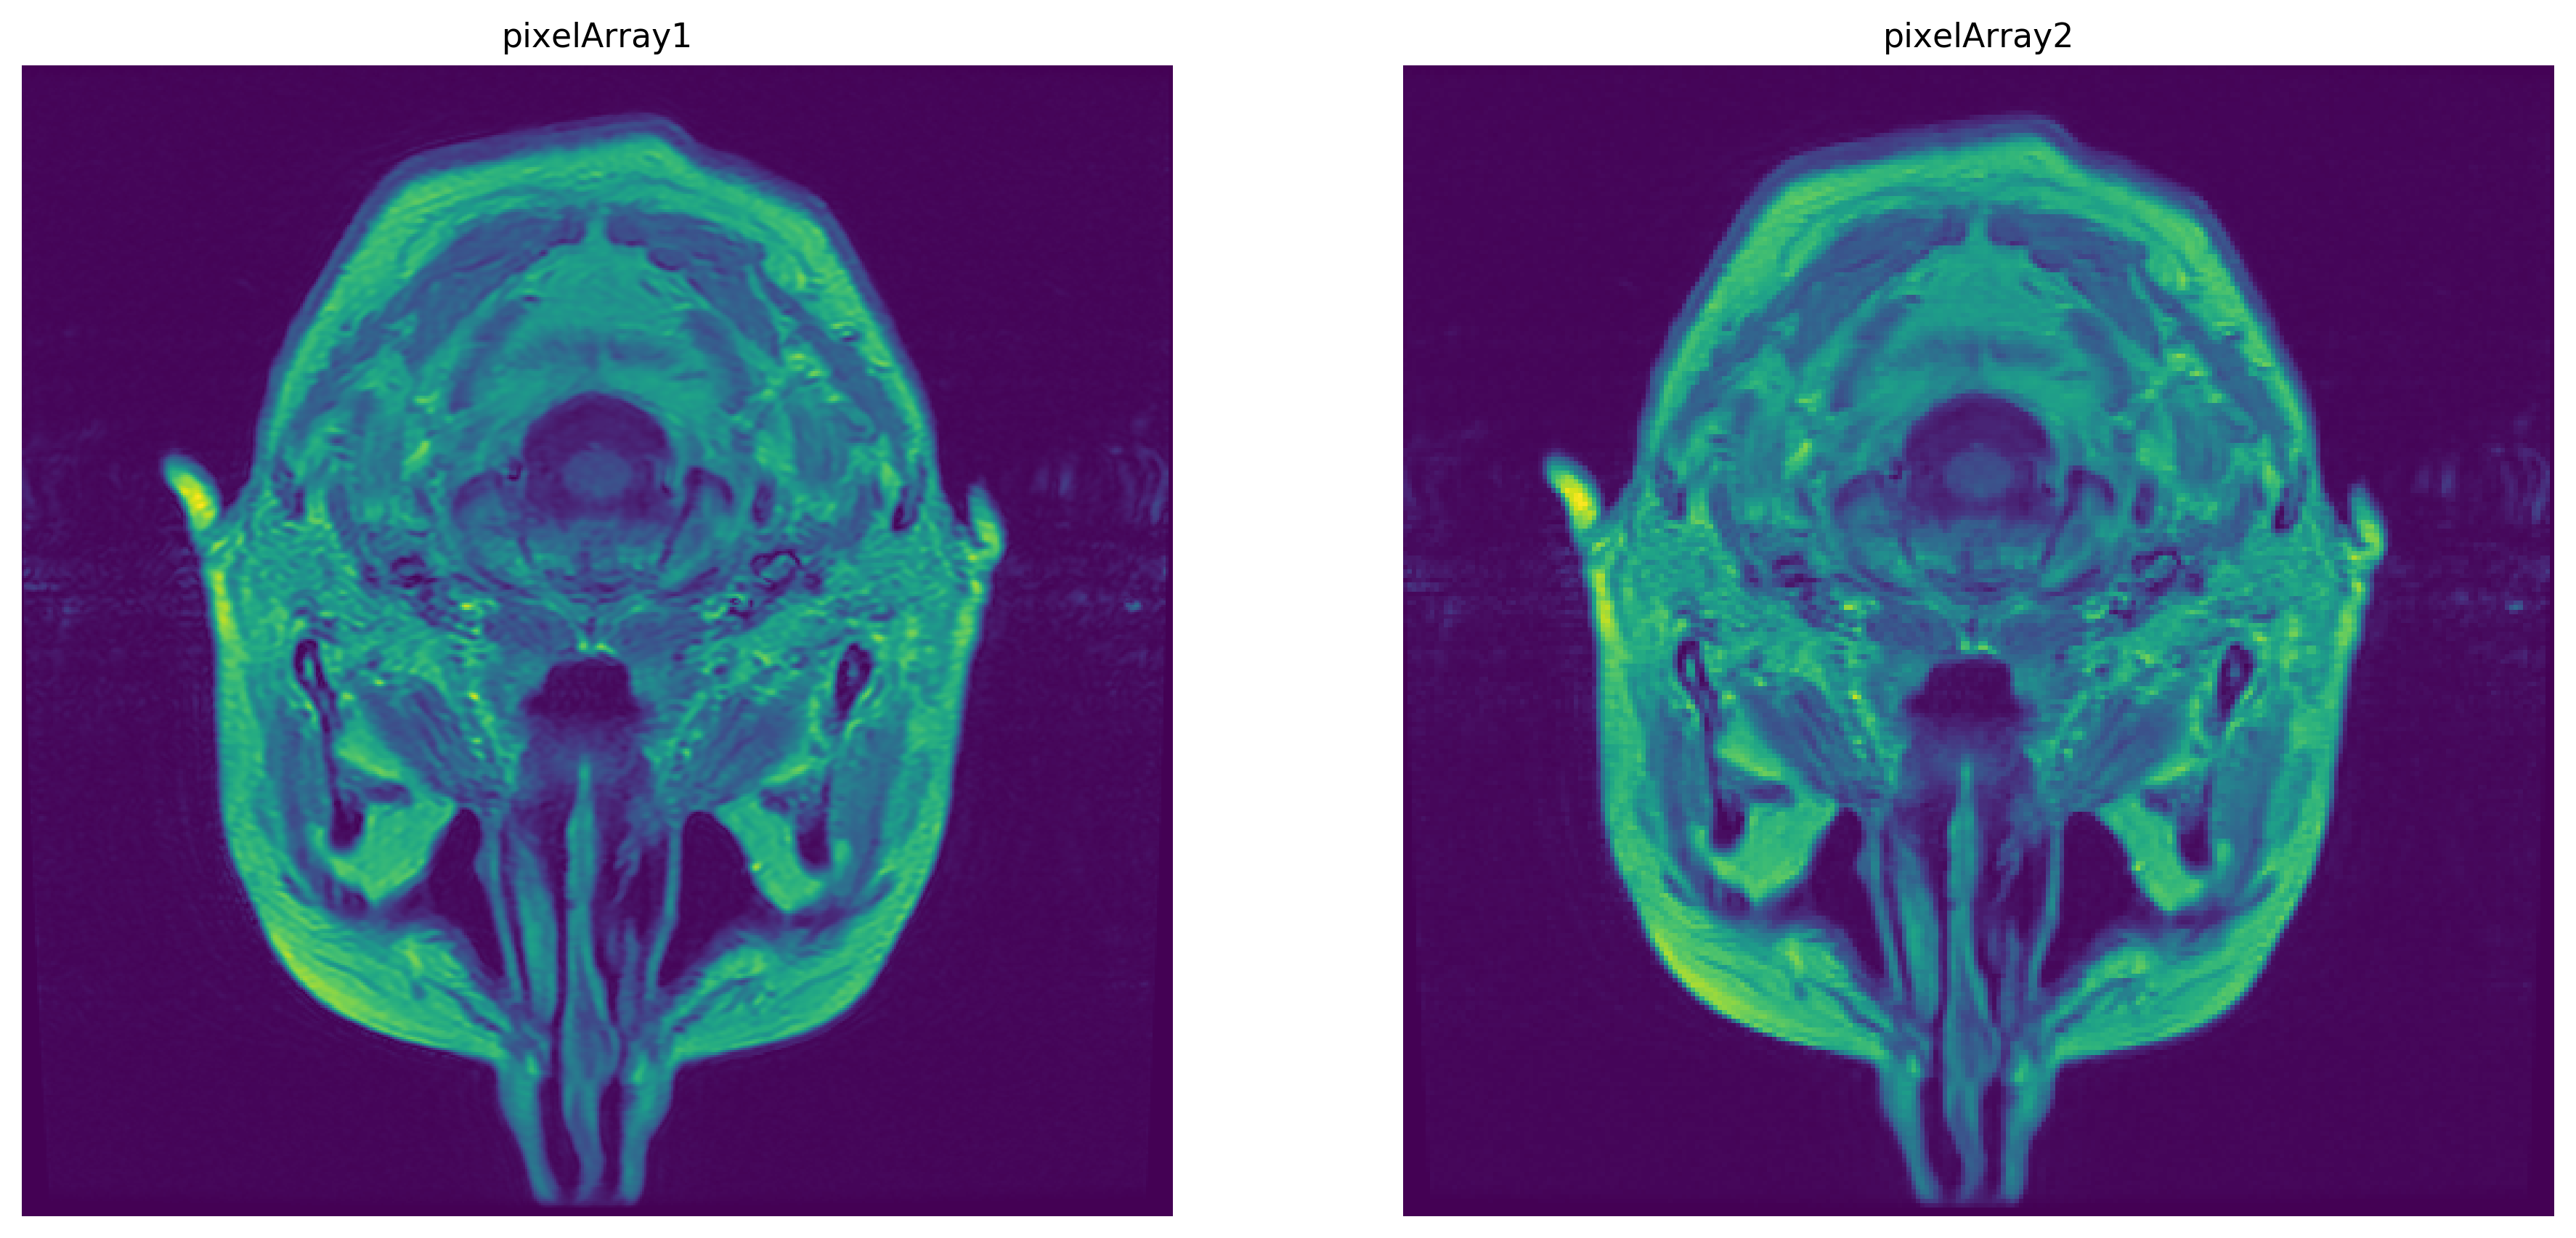

In [7]:
# Plot the results:

# Configure plot:

# Set the title font:
fontSize=11

plt.figure(figsize=(15,15), dpi=300);

i = 0 # for subplot pos

# Plot the pixel array:
i = i + 1    
plt.subplot(1,2,i, aspect='equal')
plt.pcolormesh(pixArray1);
plt.title(f'pixelArray1', size=fontSize);
plt.axis('off');

# Plot the pixel array:
i = i + 1    
plt.subplot(1,2,i, aspect='equal')
plt.pcolormesh(pixArray2);
plt.title(f'pixelArray2', size=fontSize);
plt.axis('off');

# Much more concise approach taken here:

### https://stackoverflow.com/questions/48860881/how-to-replace-pixel-data-on-same-dicom-file-using-pydicom-to-read-it-again-with

In [8]:
start = datetime.datetime.now()

pixArray3 = pixArray1[::BF, ::BF]

end = datetime.datetime.now()
elapsed = end - start

print('np.shape(pixArray3) =', np.shape(pixArray3))
print('np.max(pixArray1) =', np.max(pixArray1))
print('np.max(pixArray2) =', np.max(pixArray2))
print('np.max(pixArray3) =', np.max(pixArray3))

print(f'\nTook {elapsed.seconds + elapsed.microseconds/10**6} s to compute')

np.shape(pixArray3) = (256, 256)
np.max(pixArray1) = 3571
np.max(pixArray2) = 3461.0
np.max(pixArray3) = 3563

Took 0.0 s to compute


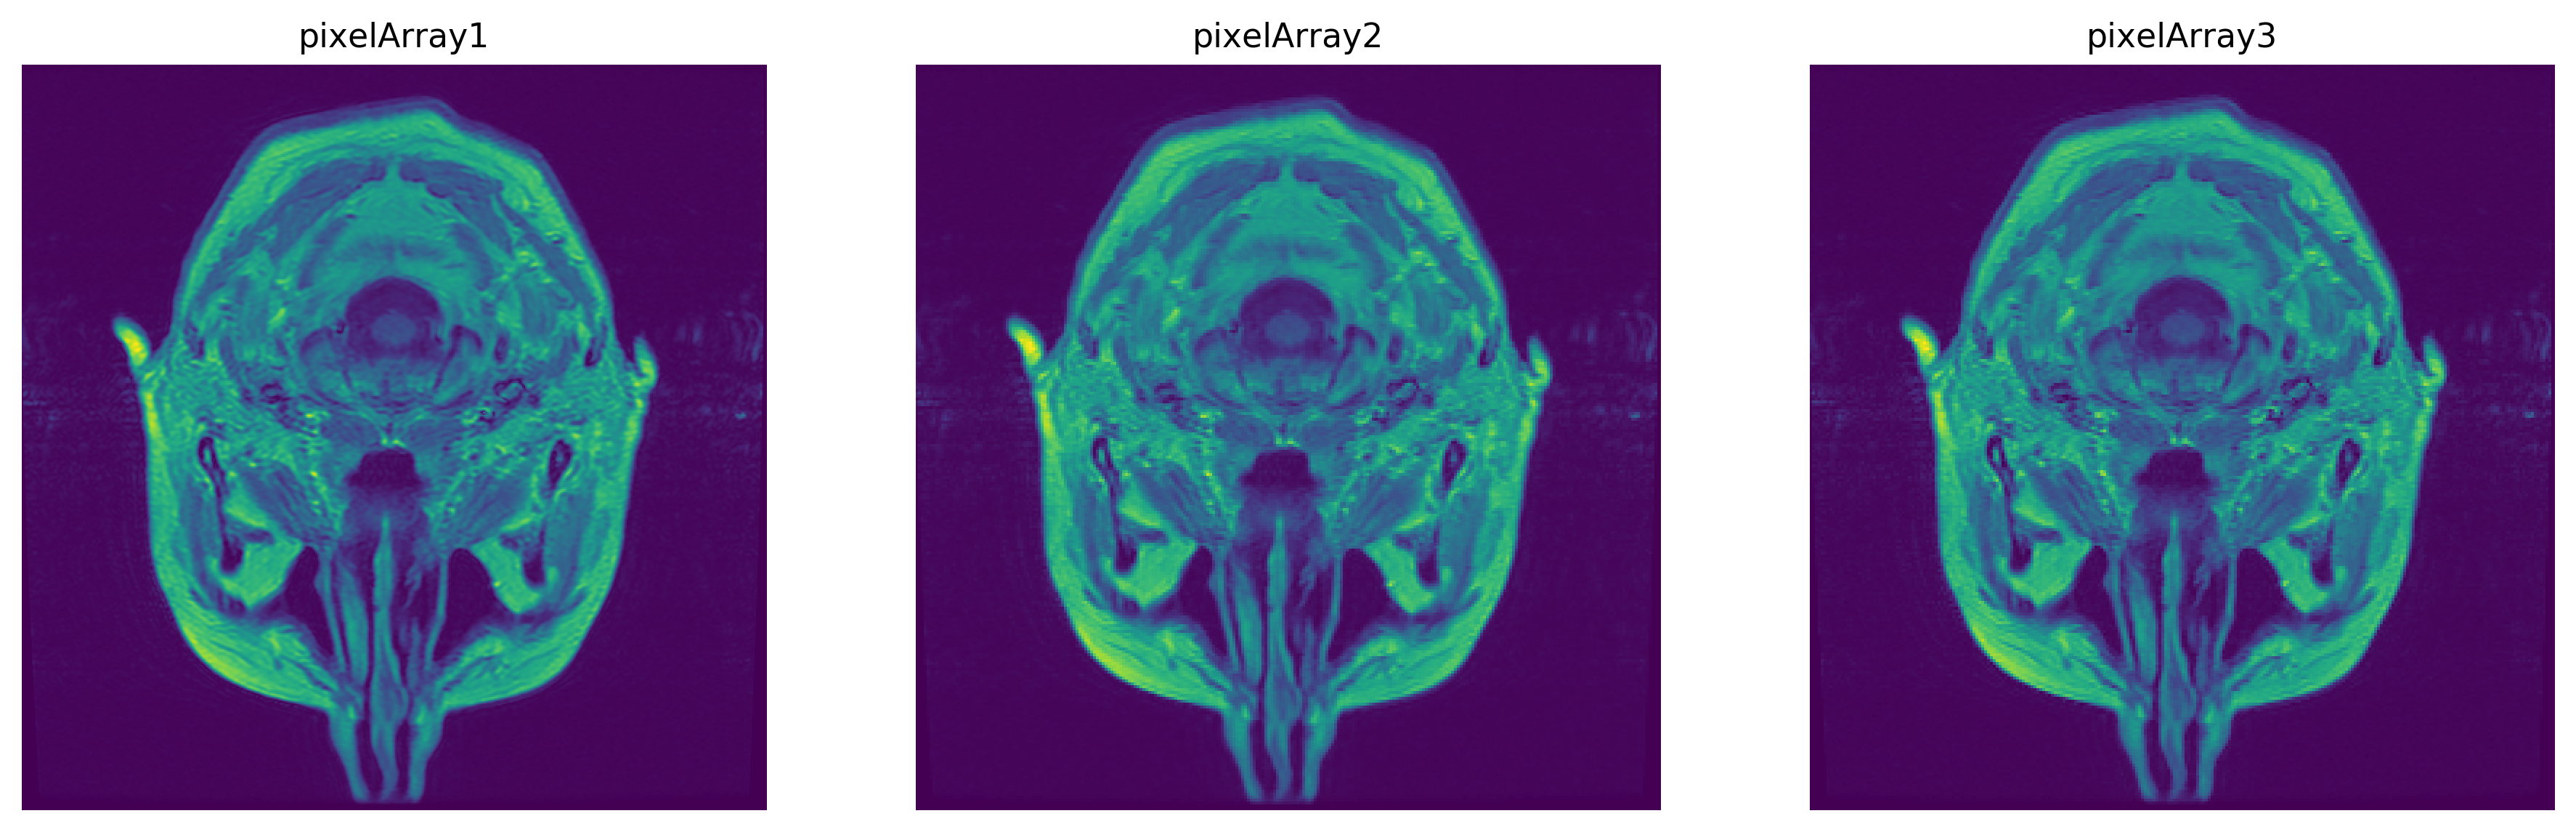

In [9]:
# Plot the results:

# Configure plot:

# Set the title font:
fontSize=11

# Number of subplot rows and cols:
rows = 1
cols = 3

plt.figure(figsize=(15,15), dpi=300);

i = 0 # for subplot pos

# Plot the pixel array:
i = i + 1    
plt.subplot(rows,cols,i, aspect='equal')
plt.pcolormesh(pixArray1);
plt.title(f'pixelArray1', size=fontSize);
plt.axis('off');

# Plot the pixel array:
i = i + 1    
plt.subplot(rows,cols,i, aspect='equal')
plt.pcolormesh(pixArray2);
plt.title(f'pixelArray2', size=fontSize);
plt.axis('off');

# Plot the pixel array:
i = i + 1    
plt.subplot(rows,cols,i, aspect='equal')
plt.pcolormesh(pixArray3);
plt.title(f'pixelArray3', size=fontSize);
plt.axis('off');

# Read in the original DICOMs, reduce the resolution of their pixel arrays and export the new DICOMs:

## Now loop through all DICOMs:

In [17]:
# The bin factor:
BF = 2


# Get the filepaths of the DICOMs:
dicomsFpaths1 = GetDicomFpaths(origDicomsDir)

# Load each DICOM, get the pixel array, reduce the resolution, and export to a new DICOM file:
for f in range(len(dicomsFpaths1)):
    fpath1 = dicomsFpaths1[f]
    
    # Read in the DICOM file:
    dicom1 = pydicom.read_file(fpath1)
    
    # Get the pixel array:
    pixArray1 = dicom1.pixel_array
    
    Nrows1, Ncols1 = np.shape(pixArray1)

    #print('Nrows1 =', Nrows1, 'and Ncols1 =', Ncols1)

    Nrows2 = int(Nrows1/BF)
    Ncols2 = int(Ncols1/BF)

    #print('Nrows2 =', Nrows2, 'and Ncols2 =', Ncols2)

    # Create a new pixel array = bin the original pixel array:
    pixArray2 = pixArray1[::BF, ::BF]
    
    # Make a copy of the original DICOM:
    dicom2 = copy.deepcopy(dicom1)
    
    # Modify the pixel array of the copy:
    dicom2.PixelData = pixArray2.tostring()
    
    # Create new (unique) UIDs:
    #
    # 1. SOP Instance UID (0008, 0016)
    #
    # 2. Series Instance UID (0020, 000e)
    #
    # 3. Referenced Performed Procedure Step Sequence (0008, 1111)
    #    -> Referenced SOP Instance UID (0008, 1155)
    #
    # 4. Referenced Performed Procedure Step Sequence (0008, 1111)
    #    -> Referenced SOP Instance UID (0008, 1155)
    #       -> Referenced Image Sequence (0008, 1140)
    #           -> Referenced SOP Instance UID (0008, 1155) for each sequence
    #
    # I'm not sure that #3 or #4 are necessary but I will do so anyway. 
    
    
    # Modify the SOP Instance UID (0008, 0016). Use pydicom to generate a unique UID:
    dicom2.SOPInstanceUID = pydicom.uid.generate_uid()
    
    # Modify the Series Instance UID (0020, 000e). Use pydicom to generate a unique UID:
    # Note:  A new Series Instance UID should only be generated once, and that same uid
    # used for all DICOMs:
    if f==0:
        newSeriesUID = pydicom.uid.generate_uid()
    dicom2.SeriesInstanceUID = newSeriesUID
    
    # Modify the Referenced SOP Instance UID (0008, 1155) from the Referenced Performed
    # Procedure Step Sequence (0008, 1111). Use pydicom to generate a unique UID:
    dicom2.ReferencedPerformedProcedureStepSequence[0].ReferencedSOPInstanceUID = pydicom.uid.generate_uid()
    
    # Modify the Referenced SOP Instance UID (0008, 1155) from the Referenced Image Sequence
    # (0008, 1140). Use pydicom to generate a unique UID. Iterate for all sequences:
    for s in range(len(dicom2.ReferencedImageSequence)):
        dicom2.ReferencedImageSequence[s].ReferencedSOPInstanceUID = pydicom.uid.generate_uid()
    
    # Modify the Series Description (0008, 103e) (not necessary but useful):
    # e.g. 'T1post', "T1post_2x" where "2x" represents the bin factor
    dicom2.SeriesDescription = dicom2.SeriesDescription + "_" + str(BF) + "x_bin"
    
    # Modify the Series Number (0020, 0011) (not necessary but useful):
    # e.g. '11', "11020" where the 2 = bin factor, flanked by zeros
    dicom2.SeriesNumber = str(dicom2.SeriesNumber) + "0" + str(BF) + "0"
    
    # Modify the Rows and Columns:
    dicom2.Rows = Nrows2
    dicom2.Columns = Ncols2
    
    # Modify the Pixel Spacing.  First get the original pixel spacing:
    pixSpacingR, pixSpacingC = dicom1.PixelSpacing # e.g. ["0.4297", "0.4297"]
    
    # Multiply the original pixel spacing by the binning factor and store as the Pixel Spacing
    # for the new DICOM object:
    dicom2.PixelSpacing = [np.sqrt(BF)*float(pixSpacingR), np.sqrt(BF)*float(pixSpacingC)]
    
    # Modify the Largest Image Pixel Value:
    dicom2.LargestImagePixelValue = int(np.max(pixArray2))
    
    # Generate a new filename for the new DICOM. It seems that the original filenames have the
    # following form: StudyInstanceUID-SeriesNumber-scanNo-xxxxxxx.dcm
    # where scanNo = 1, 2, 3, ... and the last 7 characters appear to be a randomly generated
    # list of alpha-numerics.  Follow the same form but omitting the final 7 alpha-numerics:
    #fname2 = str(dicom2.SeriesInstanceUID) + '-' + str(dicom2.SeriesNumber) + '-' + str(f+1) + '.dcm'
    fname2 = r'' + str(dicom2.SeriesInstanceUID) + '-' + str(dicom2.SeriesNumber) + '-' + str(f+1) + '.dcm'
    
    
    fpath2 = os.path.join(newDicomsDir, fname2)
    
    # Save the new DICOM:
    dicom2.save_as(fpath2)

    

In [34]:
dicom1

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.249871792500404987657375581950
(0008, 0020) Study Date                          DA: '19960813'
(0008, 0021) Series Date                         DA: '19960813'
(0008, 0022) Acquisition Date                    DA: '19960813'
(0008, 0023) Content Date                        DA: '19960813'
(0008, 0030) Study Time                          TM: '164104.000000'
(0008, 0031) Series Time                         TM: '162908'
(0008, 0032) Acquisition Time                    TM: '162908'
(0008, 0033) Content Time                        TM: '162908'
(0008, 0050) Accession Number                    SH: '7351166753651521'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufa

In [84]:
fpath

'C:\\Code\\WP1.3_multiple_modalities\\trying stuff\\XNAT downloads\\BrainTumorProg\\PGM-002\\PGM-002_MR_1\\T1post\\PGM-002_MR_1\\scans\\11-T1post\\resources\\DICOM\\files\\1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-1-xb6jdm.dcm'

In [38]:
pixSpacingR, pixSpacingC = dicom1.PixelSpacing

In [39]:
pixSpacingR

"0.4297"

In [40]:
float(pixSpacingR)

0.4297

In [43]:
float(pixSpacingR)*np.sqrt(BF)

0.8594

In [46]:
[np.sqrt(BF)*float(pixSpacingR), np.sqrt(BF)*float(pixSpacingC)]

[0.8594, 0.8594]

In [59]:
np.max(pixArray1)

3571

In [58]:
np.max(pixArray2)

3461.0

In [61]:
str(int(np.max(pixArray2)))

'3461'

In [85]:
dicom1.pixel_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [23, 22, 28, ..., 20,  0,  0],
       [15, 10, 12, ...,  9,  0,  0],
       [17, 13, 10, ...,  8,  0,  0]], dtype=int16)

In [64]:
pydicom.uid.generate_uid()

'1.2.826.0.1.3680043.8.498.71091352796788194796540474565540112504'

In [65]:
pydicom.uid.generate_uid()

'1.2.826.0.1.3680043.8.498.92057908762032295838048793404126505255'